In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [33]:
dt = pd.read_excel('Reading.xlsx')
#dt.set_index(['Station'], inplace = True)
#dt = dt.replace(r'^\s*$', np.NaN, regex=True)
dt = dt.replace(r'^\s*$', np.NaN, regex=True)

In [34]:
for station in range(0, len(dt.index)-1):
    
    if dt.isnull().loc[station, 'I.S.']:
        s1 = dt.loc[station, 'B.S.']
    else:
        s1 = dt.loc[station, 'I.S.']
    
    if dt.isnull().loc[(station + 1), 'F.S.']:
        s2 = dt.loc[station + 1, 'I.S.']
    else:
        s2 = dt.loc[station + 1, 'F.S.']
        
    difference = s1 - s2

    if difference > 0:
        dt.loc[station + 1, 'RISE'] = difference
    else:
        dt.loc[station + 1, 'FALL'] = difference
    
    
    dt.loc[station + 1, 'R.L.'] = dt.loc[station, 'R.L.'] + difference
    
    

In [35]:
dt.to_excel("Solved.xlsx")

In [36]:
dt

,Station,B.S.,I.S.,F.S.,RISE,FALL,R.L.
0,1,0.385,NaN,NaN,NaN,NaN,208.125
1,2,NaN,1.030,NaN,NaN,-0.645,207.480
2,3,NaN,1.925,NaN,NaN,-0.895,206.585
3,4,NaN,2.825,NaN,NaN,-0.900,205.685
4,5,NaN,3.730,NaN,NaN,-0.905,204.780
5,6,0.625,NaN,4.685,NaN,-0.955,203.825
6,7,NaN,2.005,NaN,NaN,-1.380,202.445
7,8,NaN,3.110,NaN,NaN,-1.105,201.340
8,9,NaN,NaN,4.485,NaN,-1.375,199.965


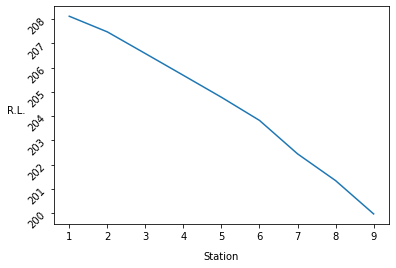

In [37]:
plt.plot(dt['Station'], dt['R.L.'])

plt.xlabel('Station', labelpad=10)
plt.ylabel('R.L.', rotation=0, labelpad=10)

plt.yticks(rotation=45)

plt.savefig('Graph.png')
plt.show()